# Building good training sets pg 107 -Python Machine Learning, S.Raschka & V. Mirjalili

In [64]:
import pandas as pd
from io import StringIO
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [2]:
abc = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

In [3]:
df=pd.read_csv(StringIO(abc))

In [4]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [5]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [6]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [7]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [9]:
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [10]:
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [11]:
df.dropna(subset=['D'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0


In [12]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
#imr.fit(df.values)

In [13]:
imr=imr.fit(df.values)

In [14]:
imputed_data=imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [15]:
df = pd.DataFrame([['green','M',10.1,'class1'],['red','L',13.5,'class2'],['blue','XL',15.3,'class1']])
df.columns = ['color','size','price','classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [16]:
size_mapping = {'XL':3,
                'L':2,
                'M':1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [17]:
inv_size_mapping = {v : k for k, v in size_mapping.items()} #inverting elements in the dictionary
df['size']=df['size'].map(inv_size_mapping)
print(inv_size_mapping)
df

{3: 'XL', 2: 'L', 1: 'M'}


,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [18]:
class_mapping = {label: idx for idx,label in enumerate(np.unique(df['classlabel']))}#directly making the dictionary with {'class':index,...} bc it doesn't matter what number each class has
class_mapping

{'class1': 0, 'class2': 1}

In [19]:
df['classlabel']=df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,0
1,red,L,13.5,1
2,blue,XL,15.3,0


In [20]:
inv_class_mapping = {v : k for k, v in class_mapping.items()}
df['classlabel']=df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [21]:
#faster
class_le=LabelEncoder()
df['classlabel']=class_le.fit_transform(df['classlabel'].values)
print(df)
#df['classlabel']=class_le.inverse_transform(y)
#print(df)

   color size  price  classlabel
0  green    M   10.1           0
1    red    L   13.5           1
2   blue   XL   15.3           0


In [22]:
X = df[['color','size','price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 'M', 10.1],
       [2, 'L', 13.5],
       [0, 'XL', 15.3]], dtype=object)

In [23]:
df


,color,size,price,classlabel
0,green,M,10.1,0
1,red,L,13.5,1
2,blue,XL,15.3,0


In [24]:
np_df = np.array(pd.get_dummies(df[['price','color','size']]))
np_df

array([[10.1,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ],
       [13.5,  0. ,  0. ,  1. ,  1. ,  0. ,  0. ],
       [15.3,  1. ,  0. ,  0. ,  0. ,  0. ,  1. ]])

In [25]:
np.delete(np_df, 2, axis=1)

array([[10.1,  0. ,  0. ,  0. ,  1. ,  0. ],
       [13.5,  0. ,  1. ,  1. ,  0. ,  0. ],
       [15.3,  1. ,  0. ,  0. ,  0. ,  1. ]])

## Wine example

In [26]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                     'ml/machine-learning-databases/'
                     'wine/wine.data',header=None)
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Classes 

In [27]:
df_wine.columns = ['Class label','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoids phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
print('Class labels',np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [28]:
df_wine.head(n=3)

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoids phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


### Divide train and test

In [29]:
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test=\
    train_test_split(X,y,
                    test_size=0.3,
                    random_state=0,
                    stratify=y)


In [30]:
y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 13)
(54, 13)
(124,)
(54,)


### Standardize and normalize

In [32]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [33]:
X_train_norm.shape

(124, 13)

In [34]:
X_test_norm.shape

(54, 13)

In [35]:
ex = np.array([0,1,2,3,4,5])
print('standardized',(ex - ex.mean()) / ex.std())
print('normalized',(ex - ex.min()) / (ex.max()-ex.min()))

standardized [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized [0.  0.2 0.4 0.6 0.8 1. ]


In [36]:
stdsc = StandardScaler()
X_train_std =  stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [37]:
X_train_std.shape

(124, 13)

In [38]:
X_test_std.shape

(54, 13)

## L1 and L2 regularization penalties

In [39]:
LogisticRegression(penalty='l1')
lr=LogisticRegression(penalty='l1',C=1.0,solver='liblinear')#the lower is c, the more zero entries (enforce sparsity)
lr.fit(X_train_std,y_train)
#print('Training accuracy: ', lr.score(X_train_std,y_train))

LogisticRegression(penalty='l1', solver='liblinear')

In [40]:
print('Training accuracy: ', lr.score(X_train_std,y_train))
lr.intercept_

Training accuracy:  1.0


array([-1.26334278, -1.21595552, -2.36992807])

In [41]:
lr.coef_.shape[1]

13

In [42]:
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoids phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


<function matplotlib.pyplot.show(*args, **kw)>

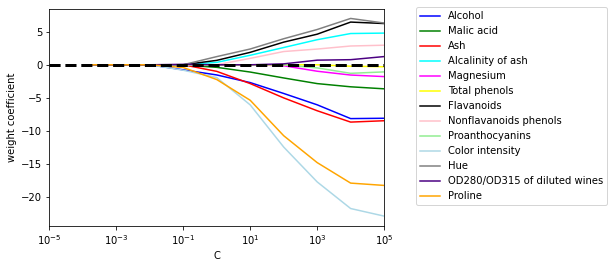

In [43]:
fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue','green','red','cyan','magenta','yellow','black','pink','lightgreen','lightblue','gray','indigo','orange']
weights,params = [], []

for c in np.arange(-4,6): #10 different C values
    lr = LogisticRegression(penalty='l1',
                            C=10.**c,
                            random_state=0,
                            solver='liblinear')
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])#13 weights of class2
    params.append(10.**c)#each value of C parameter used
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]),colors):#we can substitute the zip for enumerate(colors). Here each column (feature) is assigned to a color
    plt.plot(params,weights[:,column],#plotting in each iteration: all 10 C values for 1 feature column which contains 10 weights, one for each value of C. 13 iterations, one for each feature
            label=df_wine.columns[column+1],
            color=color)
plt.axhline(0,color='black',linestyle='--',linewidth=3)
plt.xlim([10.**(-5),10.**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper center',
          bbox_to_anchor=(1.38,1.03),
          ncol=1,fancybox=True)
plt.show

## Sequential feature selection algorithms

## SBS sequential backward selection

In [44]:
#uncomment all the print for better understanding of how this class works
class SBS():
    
    def __init__(self, estimator, k_features, #k_features specifies the the number of features we want to return
                scoring=accuracy_score,#accuracy_score from sklearn
                test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)#
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,#test subset here is the validation set. It is built from the X training data we are going to provide later
                            random_state=self.random_state)
        dim = X_train.shape[1]#(13, ) dimensions of one of the 124 samples
        
        self.indices_ = tuple(range(dim))#(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
        self.subsets_ = [self.indices_]#[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        #print('initial scores_ with the whole dimensional space ',score)
        #print('\n')
        self.scores_ = [score]

        while dim > self.k_features: #if the number of dimensions is bigger than the number of features we want to return
            #print('now with ', dim-1, 'dimensions')
            #print('\n')
            scores = []
            subsets = []
            
            for p in combinations(self.indices_,r=dim-1):#intertools.combinations creates the feature subsets
                #print('p ',p)
                #print('calculating all the scores for p indices (columns of the features)')
                score=self._calc_score(X_train,y_train,
                                      X_test,y_test,p)
                #print('score ',score)
                #print('\n')
                scores.append(score)#accuracy score for each p
                subsets.append(p)

            best=np.argmax(scores)#gives position of the highest score
            #print('position of the highest score is ',best)
            self.indices_=subsets[best]# saved the best p
            #print('indices_ (best p) appended to subsets_ ',self.indices_)
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])#Append the highest score
            #print('\n')
        self.k_score = self.scores_[-1]
        #print('k_score ',self.k_score)
        #print('\n')
        #print('\n')
        
        return self
    
    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self,X_train,y_train,X_test,y_test,
                    indices):

        self.estimator.fit(X_train[:,indices], y_train)
        y_pred = self.estimator.predict(X_test[:,indices])
        score = self.scoring(y_test,y_pred)#calculating accuracy score with sklearn. We are using here the validation dataset
        return score

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn,k_features=1)
sbs.fit(X_train_std,y_train)


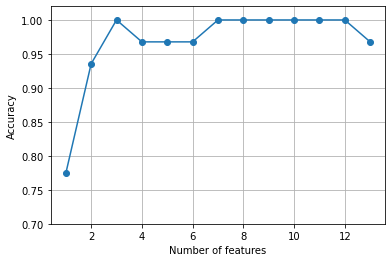

In [46]:
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylim([0.7,1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

Using 3 features is the best option

In [47]:
for k in sbs.subsets_:
    print(k)

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12)
(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11)
(0, 1, 2, 3, 4, 5, 6, 7, 9, 11)
(0, 1, 2, 3, 4, 5, 7, 9, 11)
(0, 1, 2, 3, 5, 7, 9, 11)
(0, 1, 2, 3, 5, 7, 11)
(0, 1, 2, 3, 5, 11)
(0, 1, 2, 3, 11)
(0, 1, 2, 11)
(0, 1, 11)
(0, 11)
(0,)


In [48]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


### Score for the whole dimensional space

In [49]:
knn.fit(X_train_std,y_train)
print('Training accuracy: ',knn.score(X_train_std, y_train))
print('Test accuracy: ',
     knn.score(X_test_std, y_test))

Training accuracy:  0.967741935483871
Test accuracy:  0.9629629629629629


### Score for SBS feature space (3 features)

In [50]:
knn.fit(X_train_std[:,k3],y_train)
print('Training accuracy ',knn.score(X_train_std[:,k3],y_train))
print('Test accuracy: ', knn.score(X_test_std[:,k3], y_test))


Training accuracy  0.9516129032258065
Test accuracy:  0.9259259259259259


## Assessing feature importance with random forests

In [51]:
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train,y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]#mirroring, so now it's from biggest to smallest


In [58]:
feat_labels

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoids phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoids phenols          0.013354
13) Ash                            0.013279




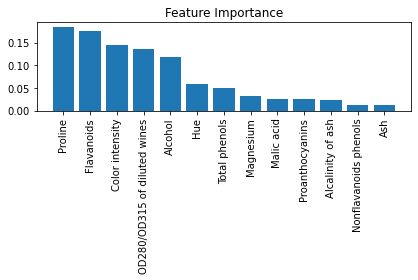

In [62]:
f_labels = []
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f +1, 30, feat_labels[indices[f]], importances[indices[f]]))
    f_labels.append(feat_labels[indices[f]])
print('\n')
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]),f_labels,rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

SelectFromModel object selects features based on a user-specified threshold after model fitting.

In [76]:
sfm = SelectFromModel(forest,threshold=0.15,prefit=True)
X_selected = sfm.transform(X_train)
print('Number of samples that meet this criterion: ',
    X_selected.shape[0])
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f +1, 30, feat_labels[indices[f]], importances[indices[f]]))

Number of samples that meet this criterion:  124
 1) Proline                        0.185453
 2) Flavanoids                     0.174751


In [69]:
X_selected.shape

(124, 5)